This model is a **Recurrent Neural Network (RNN) using LSTM** designed for processing **sequential data** such as text, audio, or time-series data. Here’s how it works:

1. **Model Input**  
   - Each input sample is a **sequence** consisting of multiple **15-dimensional vectors (input_size = 15)**.  
   - These vectors typically represent features at each time step.

2. **LSTM Layer**  
   - The model has **3 LSTM layers (num_layers = 3)** that process information hierarchically.  
   - Each layer contains **30 hidden neurons (hidden_size = 30)** to store information over time.

3. **Initial States (Hidden & Cell States)**  
   - At the start, the model initializes two states **h0** and **c0** to zeros. These represent the initial network state.

4. **Data Flow in LSTM**  
   - The input sequence **passes through the LSTM layers step by step**.  
   - Although LSTM produces outputs at each time step, **only the last output** (from the final time step) is used for the next stage.

5. **Output Layer (Fully Connected Layer)**  
   - The last output from LSTM is passed through a **fully connected layer** that reduces the output size to **8 classes (output_size = 8)**.  
   - This output is typically used for **classification or final value prediction** in time-series tasks.

### **What is this model useful for?**  
**Text analysis** (e.g., sentence classification)  
**Speech processing** (e.g., emotion detection from voice)  
**Time-series forecasting** (e.g., stock prices or weather prediction)  



In [8]:
import torch
import torch.nn as nn

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))

        # pass the last time step's output through the fully connected layer
        out = self.fc(out[:, -1, :])
        return out

# setting
input_size = 10
hidden_size = 20
output_size = 5
num_layers = 2

# building model
model = SimpleRNN(input_size, hidden_size, output_size, num_layers)
print(model)


SimpleRNN(
  (lstm): LSTM(10, 20, num_layers=2, batch_first=True)
  (fc): Linear(in_features=20, out_features=5, bias=True)
)


In [9]:
import torch

# testing
batch_size = 3
seq_length = 7
input_size = 10

x_test = torch.randn(batch_size, seq_length, input_size)

# performance
output = model(x_test)
print("Output shape:", output.shape)  # output (3,5)

Output shape: torch.Size([3, 5])


<ipython-input-15-b92de48c4cbb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=layers, y=neurons, palette="viridis")


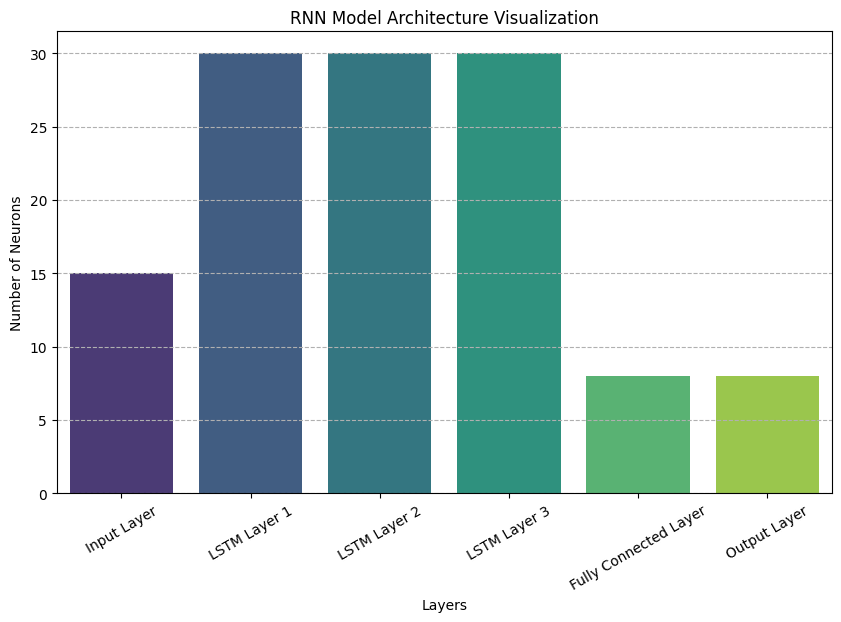

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# define model layer sizes
layers = ["Input Layer", "LSTM Layer 1", "LSTM Layer 2", "LSTM Layer 3", "Fully Connected Layer", "Output Layer"]
neurons = [15, 30, 30, 30, 8, 8]  # number of neurons in each layer

plt.figure(figsize=(10, 6))
sns.barplot(x=layers, y=neurons, palette="viridis")
plt.xlabel("Layers")
plt.ylabel("Number of Neurons")
plt.title("RNN Model Architecture Visualization")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--")

plt.show()
